**Drishti Jain**

**Task 1: Supervised Machine Learning**

email: drishtijain.0120@gmail.com

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [3]:
data=pd.read_csv('http://bit.ly/w-data')

In [4]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.shape

(25, 2)

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Visualizing the data for a better understanding of correlation among variables**


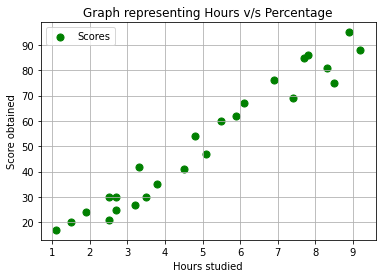

In [13]:
x= data['Hours']
y=data['Scores']
plt.scatter(x,y,label='Scores',color='green',marker='o',s=50)
plt.xlabel('Hours studied')
plt.ylabel('Score obtained')
plt.title('Graph representing Hours v/s Percentage')
plt.legend()
plt.grid()
plt.show()

**Positive correlation observed among hours studied and marks obtained**

**Box Plot**




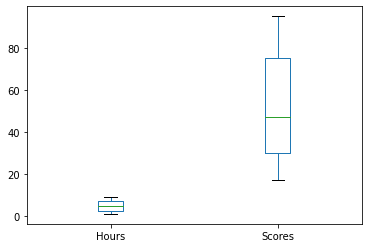

In [14]:
data.plot(kind='box')
plt.show()

**Dist Plot**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


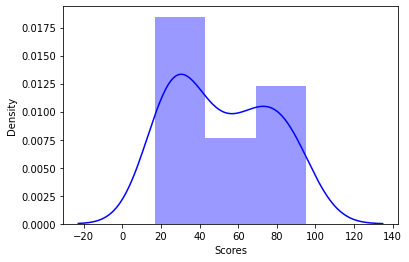

In [16]:
sns.distplot(data['Scores'],color='blue')
plt.show()

In [17]:
print('Average Percentage: ',data['Scores'].mean())

Average Percentage:  51.48


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


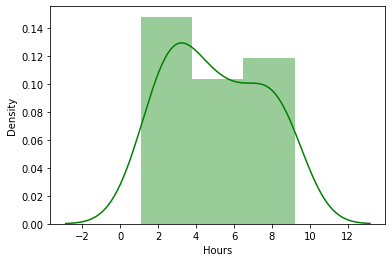

In [18]:
sns.distplot(data['Hours'],color='green')
plt.show()

**Heat Map**

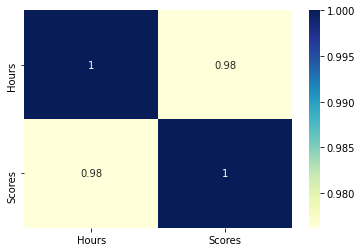

In [19]:
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)
plt.show()

**Preparing data for model**

In [21]:
X=data[['Hours']].values
y=data[['Scores']].values


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=0)

**Training the model**

In [23]:
from sklearn.linear_model import LinearRegression
training=LinearRegression()
training.fit(X_train,y_train)
print('Training Successful')

Training Successful


**Plotting the Regression Line**

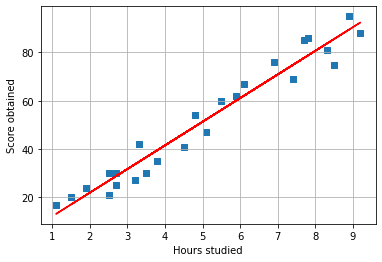

In [24]:
line=training.coef_*X+training.intercept_
plt.scatter(X,y, marker='s')
plt.plot(X,line,c='red')
plt.xlabel('Hours studied')
plt.ylabel('Score obtained')
plt.grid()
plt.show()

**Prediction of Scores**

In [26]:
print('Training Score')
print(training.score(X_train,y_train))
print('Test Score')
print(training.score(X_test,y_test))

Training Score
0.9484997422695115
Test Score
0.9568211104435257


In [27]:
y_pred=training.predict(X_test)
y_pred

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

**For 9.25 hours per day**

In [28]:
hrs=9.25
own_pred=training.predict([[hrs]])
print('Hours Studied:',format(hrs))
print('Predicted Score:',format(own_pred[0]))

Hours Studied: 9.25
Predicted Score: [92.91505723]


**Model Evaluation**

In [29]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.419727808027651
Mean Squared Error: 22.965097212700428
Root Mean Squared Error: 4.7921912746363144
